In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
train_images_np=np.load('./Project3_Data/MNIST_train_images.npy')
train_labels_np=np.load('./Project3_Data/MNIST_train_labels.npy')
val_images_np=np.load('./Project3_Data/MNIST_val_images.npy')
val_labels_np=np.load('./Project3_Data/MNIST_val_labels.npy')
test_images_np=np.load('./Project3_Data/MNIST_test_images.npy')
test_labels_np=np.load('./Project3_Data/MNIST_test_labels.npy')
print(len(train_images_np))
print(len(val_images_np))
print(len(test_images_np))

50000
5000
5000


In [3]:
##Template MLP code
def softmax(x):
    return np.exp(x)/np.sum(np.exp(x))

def sigmoid(x):
    return 1/(1+np.exp(-x))

def CrossEntropy(y_hat,y):
    return -np.dot(y,np.log(y_hat))

class MLP():

    def __init__(self):
        #Initialize all the parametres
        #Uncomment and complete the following lines
        self.W1=np.random.normal(size=(784,64),scale=0.1)# 784x64
        self.b1=np.zeros((1,64))
        self.W2=np.random.normal(size=(64,10),scale=0.1)# 64x10
        self.b2=np.zeros((1,10))
        self.reset_grad()

    def reset_grad(self):
        self.W2_grad = 0
        self.b2_grad = 0
        self.W1_grad = 0
        self.b1_grad = 0

    def forward(self, x):
        #Feed data through the network
        #Uncomment and complete the following lines
        self.x=np.matrix(x)
        self.W1x=np.matmul(self.x,self.W1)
        self.a1=self.W1x + self.b1
        self.f1=sigmoid(self.a1)
        self.W2x=np.matmul(self.f1,self.W2)      
        self.a2=self.W2x + self.b2
        self.y_hat=softmax(self.a2)
        self.y_hat = np.array(self.y_hat)
        return self.y_hat

    def update_grad(self,y): # y is a 1x10 matrix with the class having value of 1 and everything else 0
        # Compute the gradients for the current observation y and add it to the gradient estimate over the entire batch
        # Uncomment and complete the following lines
        dA2db2=1
        dA2dW2=self.f1
        dA2dF1=self.W2
        dF1dA1=np.multiply(sigmoid(self.a1),(1-sigmoid(self.a1)))
        dA1db1=1
        dA1dW1=self.x
        dLdA2 = self.y_hat-y
        dLdW2 = np.matmul(dLdA2.reshape(-1,1),self.f1)
        dLdb2 = dLdA2 
        dLdF1 = np.matmul(dLdA2,self.W2.T)
        dLdA1 = np.multiply(np.matmul(dLdA2,self.W2.T),dF1dA1)
        #print(np.multiply(np.matmul(dLdA2,self.W2.T),dF1dA1).T)
       # print(len(self.x[0]))
        dLdW1 = np.matmul(np.multiply(np.matmul(dLdA2,self.W2.T),dF1dA1).T,self.x)
        dLdb1 = np.multiply(np.matmul(dLdA2,self.W2.T),dF1dA1)
        self.W2_grad = self.W2_grad + dLdW2
        #print(self.W2_grad)
        self.b2_grad = self.b2_grad + dLdb2
        self.W1_grad = self.W1_grad + dLdW1
        self.b1_grad = self.b1_grad + dLdb1
        pass

    def update_params(self,learning_rate):
        #print(self.W2_grad)
        self.W2 = self.W2 - learning_rate * self.W2_grad.T
        self.b2 = self.b2 - learning_rate * self.b2_grad.reshape(-1)
        self.W1 = self.W1 - learning_rate * self.W1_grad.T
        self.b1 = self.b1 - learning_rate * self.b1_grad.reshape(-1)

## Init the MLP
myNet=MLP()


In [4]:
len(train_images_np[0].reshape(-1,1))
train_labels_np[100]
indexes = np.arange(50000)
np.random.shuffle(indexes)
indexes


array([ 9413, 15823, 41008, ...,  9771, 15380, 25229])

In [5]:
# compute training and validation set

def set_accuracy(myNet,X,Y,size):
    X_val = X
    y_val = Y
    success = 0
    for i in range(size):
        Y_hat = myNet.forward(X_val[i])
        Y = np.zeros(10)
        Y[y_val[i]] = 1
        if (np.argmax(Y_hat) == np.argmax(Y)):
            success += 1
    print(success/size)
    return success/size

#######################################################

learning_rate=1e-3
n_epochs=100
batch_size = 256
X = train_images_np
y = train_labels_np
success = 0
## Training code SGD
def SGD(myNet,X,y,learning_rate,n_epochs, batch_size,n_images):
    accuracies = []
    n_batches = int(np.ceil(n_images/256))
    X_val = X
    y_val = y
    v_acc = []
    tr_acc = []
    for iter in range(n_epochs):
        #Code to train network goes here
        #form minibatches 
        start = 0
        success = 0
        for ind in range(n_batches): # iterate for 256*n number of images
            indexes = np.arange(50000)
            np.random.shuffle(indexes)
            if ind == n_batches-1:
                end = end + (n_images%batch_size)
            else:               
                end = (ind + 1) * batch_size
            myNet.reset_grad()
            for i in range(start,end): # iterate in groups of batch size 256
                Y_hat = myNet.forward(X[indexes[i]])
                #Y_hat_val = myNet.forward
                #create answer array
                Y = np.zeros(10)
                Y[y[indexes[i]]] = 1
                loss = CrossEntropy(Y_hat.T,Y)
                #print(loss)
                #print(Y_hat)
                #print(Y)
                myNet.update_grad(Y)
                if (np.argmax(Y_hat) == np.argmax(Y)):
                    success += 1
            myNet.update_params(learning_rate)
            start = end
        #run tests on validation set and training set
        print(iter)
        v_acc.append(set_accuracy(myNet,val_images_np,val_labels_np,len(val_images_np)))
        tr_acc.append(set_accuracy(myNet,train_images_np,train_labels_np,len(train_images_np)))
        #accuracies.append(success/2000)
    return v_acc,tr_acc

        # pass
        #Code to compute validation loss/accuracy goes here
    #print(accuracies)
    #print(success)
v_acc,tr_acc = SGD(myNet,X,y,learning_rate,n_epochs,batch_size,2000)


<ipython-input-3-ea9da403b8fc>:6: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


0
0.4462
0.44898
1
0.5768


KeyboardInterrupt: 

In [8]:
np.save("W2.npy",myNet.W2)

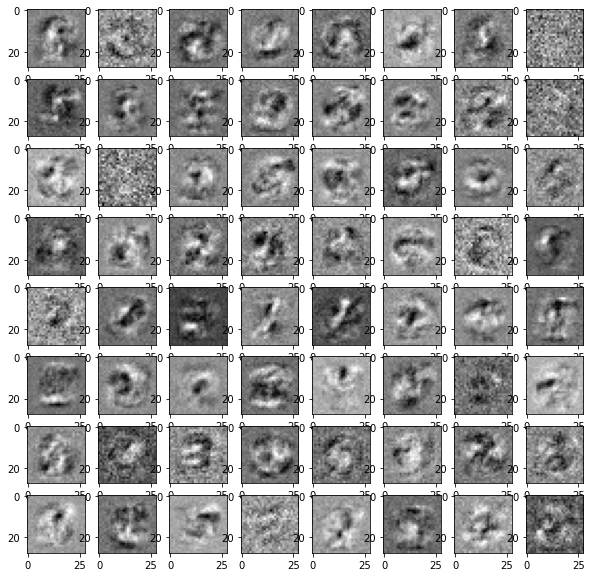

In [30]:
a = np.load("W1.npy")
a = a.T
width=5
height=5
rows = 8
cols = 8
axes=[]
fig=plt.figure(figsize = (10,10))

for i in range(rows*cols):
    b = np.reshape(a[i],(28,28))
    axes.append( fig.add_subplot(rows, cols, i+1) )
    #subplot_title=(str(i))
    #axes[-1].set_title(subplot_title)  
    plt.imshow(b,cmap="gray")
#fig.tight_layout()    
plt.show()

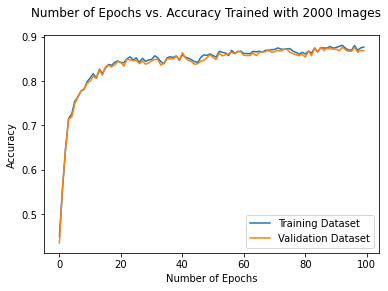

In [16]:

plt.plot(np.arange(100),tr_acc,label="Training Dataset")
plt.plot(np.arange(100),v_acc,label="Validation Dataset")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.suptitle("Number of Epochs vs. Accuracy Trained with 2000 Images")
plt.show()


In [17]:
def test_accuracy(myNet):
    conf_matrix = np.zeros((10,10))
    X_val = test_images_np
    y_val = test_labels_np
    success = 0
    for i in range(5000):
        Y_hat = myNet.forward(X_val[i])
        Y = np.zeros(10)
        Y[y_val[i]] = 1
        if (np.argmax(Y_hat) == np.argmax(Y)):
            success += 1
        conf_matrix[np.argmax(Y_hat),np.argmax(Y)] += 1
    conf_matrix[0] = np.true_divide(conf_matrix[0],(y_val == 0).sum())
    conf_matrix[1] = np.true_divide(conf_matrix[1],(y_val == 1).sum())
    conf_matrix[2] = np.true_divide(conf_matrix[2],(y_val == 2).sum())
    conf_matrix[3] = np.true_divide(conf_matrix[3],(y_val == 3).sum())
    conf_matrix[4] = np.true_divide(conf_matrix[4],(y_val == 4).sum())
    conf_matrix[5] = np.true_divide(conf_matrix[5],(y_val == 5).sum())
    conf_matrix[6] = np.true_divide(conf_matrix[6],(y_val == 6).sum())
    conf_matrix[7] = np.true_divide(conf_matrix[7],(y_val == 7).sum())
    conf_matrix[8] = np.true_divide(conf_matrix[8],(y_val == 8).sum())
    conf_matrix[9] = np.true_divide(conf_matrix[9],(y_val == 9).sum())   
    return success/5000,conf_matrix
percent,c_matrix = test_accuracy(myNet)
c_matrix
percent

<ipython-input-13-e59125ea042b>:6: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


0.8732

<ipython-input-3-e59125ea042b>:6: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


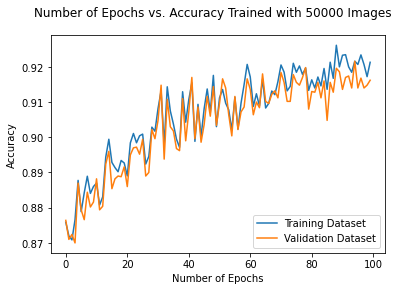

In [8]:
V,TR = SGD(X,y,learning_rate,n_epochs,batch_size,50000)
per,matr = test_accuracy(myNet)
plt.plot(np.arange(100),TR,label="Training Dataset")
plt.plot(np.arange(100),V,label="Validation Dataset")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.suptitle("Number of Epochs vs. Accuracy Trained with 50000 Images")
plt.show()

In [9]:
print(per)

0.9188


In [6]:
!pip install torchvision
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import time
import matplotlib.pyplot as plt

In [9]:
## Template for ConvNet Code
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class ConvNet(nn.Module):
    #From https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x.view(-1,1,28,28))))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = ConvNet()
torch.save(net,"./CNN")

In [8]:
learning_rate=1e-3
n_epochs=100
batch_size = 256
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5))])
X = torchvision.datasets.MNIST(root='./data', train=True,download=True, transform=transform)
X_tr,X_val = torch.utils.data.random_split(X,[50000,10000])
X_test = torchvision.datasets.MNIST(root='./data', train=False,download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(X_tr, batch_size=1,
                                          shuffle=True, num_workers=2)
valloader = torch.utils.data.DataLoader(X_val, batch_size=1,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(X_test, batch_size=batch_size,
                                         shuffle=False, num_workers=2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9)
print(len(X_test))

10000


In [4]:
def CNN_val_accuracy(net,size):
    success = 0
    for i,data in enumerate(valloader):
        #print(i)
        image,labels = data
        outputs = net(image)
        result = outputs.detach().numpy()
        labels_np = labels.detach().numpy()
        #print(result[0])
        #print(labels_np[i])
        #print(np.argmax(result[0],0))
        #print(np.sum(np.argmax(result[0],0) == labels_np))
        #print(torch.max(outputs,1))
        if (np.argmax(result[0]) == labels_np[0]):
            success += 1 
    #print(size)
    return success/size

                
def SGD_CNN(net,X,n_images,n_epochs):
    n_batches = int(np.ceil(n_images/256))
    X_val = X
    v_acc = []
    tr_acc = []
    for ite in range(n_epochs):
        #Code to train network goes here
        #form minibatches 
        start = 0
        success = 0
        dataiter = iter(trainloader)
        for ind in range(n_batches): # iterate for 256*n number of images
            optimizer.zero_grad()            
            if ind == n_batches-1:
                end = end + (n_images%batch_size)
            else:               
                end = (ind + 1) * batch_size
            for i in range(start,end):
                #print(i)
                images,labels = dataiter.next()
                # forward + backward + optimize
                outputs = net(images)
                result = outputs.detach().numpy()
                labels_np = labels.detach().numpy()
                if (np.argmax(result[0]) == labels_np[0]):
                    success += 1 
                #print(labels_np[0])
                #print("kjh")
                loss = criterion(outputs, labels)
                loss.backward()
            #print("asd")
            optimizer.step()
            start = end
            #print(start)
            #run tests on validation set and training set
            #v_acc.append(set_accuracy(myNet,val_images_np,val_labels_np,len(val_images_np)))
            #tr_acc.append(set_accuracy(myNet,train_images_np,train_labels_np,len(train_images_np)))
        print("hi")
        print(success/n_images)
        tr_acc.append(success/n_images)
        v_acc.append(CNN_val_accuracy(net,10000))
        #print(v_acc)
            #accuracies.append(success/2000)
    return tr_acc,v_acc
training_accuracy, validation_accuracy = SGD_CNN(net,X_tr,2000,20)
#print(training_accuracy)
print(validation_accuracy)
#CNN_val_accuracy(net,10000)

hi
0.1515
hi
0.197
hi
0.273
hi
0.365
hi
0.5035
hi
0.527
hi
0.657
hi
0.658
hi
0.7855


KeyboardInterrupt: 

In [ ]:
plt.plot(np.arange(20),training_accuracy,label="Training Dataset")
plt.plot(np.arange(20),validation_accuracy,label="Validation Dataset")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.suptitle("Number of Epochs vs. Accuracy Trained with 2000 Images for CNN")
plt.show()


In [9]:
training_accuracy, validation_accuracy = SGD_CNN(net,X_tr,50000,20)


hi
0.95504
hi
0.96476
hi
0.97166
hi
0.9738
hi
0.97496
hi
0.97546
hi
0.97466
hi
0.97826
hi
0.97978
hi
0.9775
hi
0.97822
hi
0.98072
hi
0.98002
hi
0.97968
hi
0.9811
hi
0.98076
hi
0.97914
hi
0.79164
hi
0.10782
hi
0.10526


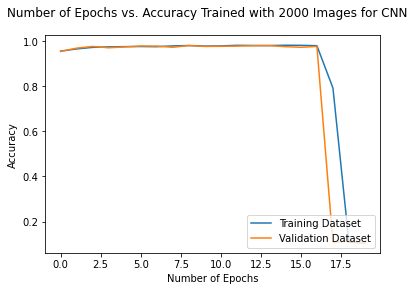

In [10]:
plt.plot(np.arange(20),training_accuracy[:18},label="Training Dataset")
plt.plot(np.arange(20),validation_accuracy,label="Validation Dataset")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.suptitle("Number of Epochs vs. Accuracy Trained with 2000 Images for CNN")
plt.show()


In [13]:
def CNN_test_accuracy(net,size):
    success = 0
    for i,data in enumerate(testloader):
        #print(i)
        image,labels = data
        outputs = net(image)
        result = outputs.detach().numpy()
        labels_np = labels.detach().numpy()
        #print(result[0])
        #print(labels_np[i])
        #print(np.argmax(result[0],0))
        #print(np.sum(np.argmax(result[0],0) == labels_np))
        #print(torch.max(outputs,1))
        if (np.argmax(result[0]) == labels_np[0]):
            success += 1 
    #print(size)
    return success/size
CNN_test_accuracy(net,len(X_test))

0.0004

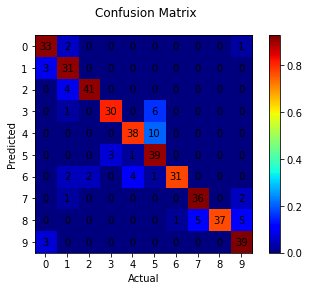

In [49]:
conf_arr = [[33,2,0,0,0,0,0,0,0,1], 
            [3,31,0,0,0,0,0,0,0,0], 
            [0,4,41,0,0,0,0,0,0,0], 
            [0,1,0,30,0,6,0,0,0,0], 
            [0,0,0,0,38,10,0,0,0,0], 
            [0,0,0,3,1,39,0,0,0,0], 
            [0,2,2,0,4,1,31,0,0,0],
            [0,1,0,0,0,0,0,36,0,2], 
            [0,0,0,0,0,0,1,5,37,5], 
            [3,0,0,0,0,0,0,0,0,39]]
conf_arr = np.array(conf_arr)
norm_conf = []
for i in conf_arr:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)

fig = plt.figure()
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = ax.imshow(np.array(norm_conf), cmap=plt.cm.jet, 
                interpolation='nearest')

width, height = conf_arr.shape

for x in range(width):
    for y in range(height):
        ax.annotate(str(conf_arr[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

cb = fig.colorbar(res)
alphabet = '0123456789'
plt.xticks(range(width), alphabet[:width])
plt.yticks(range(height), alphabet[:height])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.suptitle("Confusion Matrix")
plt.show()